In [583]:
import pandas as pd #reading csv files
import numpy as np #linear algebra and math
import matplotlib.pyplot as plt # plotting
import seaborn as sns 
import re
import sklearn
import os

%matplotlib inline

In [584]:
files = os.listdir('data')

for file in files:
    if file[-3:] != 'XPT':
        files.pop(files.index(file))
        
files

['consumerbehav_nhanes.XPT',
 'demographic_nhanes.XPT',
 'BMI.XPT',
 'healthinsurance.XPT',
 'smoking.XPT',
 'alcohol_nhanes.XPT',
 'currenthealthstatus_nhanes.XPT',
 'householdsmoke.XPT',
 'nutrition_nhanes.XPT',
 'tobacco.XPT',
 'hospital_ut.XPT',
 'sexbehav.XPT',
 'cardioheatlh_nhanes.XPT',
 'bp_cholesterol_nhanes.XPT',
 'diabetes_nhanes.XPT',
 'medical_cond.XPT',
 'housing_nhanes.XPT',
 'immunization_nhanes.XPT',
 'weight.XPT',
 'youthweight.XPT',
 'depression.XPT',
 'hepatitis_nhanes.XPT',
 'income.XPT',
 'druguse_nhanes.XPT',
 'accesshealth_nhanes.XPT']

In [585]:
d = {}

for file in files:
    df = pd.read_sas('data/' + file)
    df.set_index('SEQN', inplace=True)
    
    name = file.strip('.XPT')
    d[name] = df

In [586]:
help(pd.read_sas)

Help on function read_sas in module pandas.io.sas.sasreader:

read_sas(filepath_or_buffer, format=None, index=None, encoding=None, chunksize=None, iterator=False)
    Read SAS files stored as either XPORT or SAS7BDAT format files.
    
    Parameters
    ----------
    filepath_or_buffer : string or file-like object
        Path to the SAS file.
    format : string {'xport', 'sas7bdat'} or None
        If None, file format is inferred.  If 'xport' or 'sas7bdat',
        uses the corresponding format.
    index : identifier of index column, defaults to None
        Identifier of column that should be used as index of the DataFrame.
    encoding : string, default is None
        Encoding for text data.  If None, text data are stored as raw bytes.
    chunksize : int
        Read file `chunksize` lines at a time, returns iterator.
    iterator : bool, defaults to False
        If True, returns an iterator for reading the file incrementally.
    
    Returns
    -------
    DataFrame if it

In [587]:
# frequency per month
dmar = d['druguse_nhanes'].DUQ230 
dcoc = d['druguse_nhanes'].DUQ280
dher = d['druguse_nhanes'].DUQ320
dmeth = d['druguse_nhanes'].DUQ352
dsmoke = d['smoking'].SMD641 
dalc = d['alcohol_nhanes'].ALQ120Q # drinks per year, divide by 12




In [588]:
df = pd.concat([dmar, dcoc], axis=1)
df = pd.concat([df, dher], axis=1)
df = pd.concat([df, dmeth], axis=1)
df = pd.concat([df, dsmoke], axis=1)
df = pd.concat([df, dalc], axis=1)




# data set merge and select attributes

In [589]:
from sklearn.feature_selection import VarianceThreshold

df.dropna(axis=1, how='all')
df.dropna(axis=0, how='all')

df = df.rename(columns = {'SEQN' : 'ID',
                          'DUQ230' : 'Marijuana_use',
                          'DUQ280' : 'Cocaine_use',
                          'DUQ320' : 'Heroine_use',
                          'DUQ352' : 'Meth_use',
                          'SMD641' : 'Cigarette_use',
                          'ALQ120Q' : 'Alcohol_use'})
                     
df = df.loc[:, ['ID', 'Marijuana_use', 'Cocaine_use', 'Heroine_use','Meth_use', 'Cigarette_use', 
                'Alcohol_use']]

/Users/laura/miniconda3/envs/conda3.5/lib/python3.5/site-packages/pandas/core/indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


In [590]:
df.loc[:,'Alcohol_use'] = round(df.loc[:,'Alcohol_use'])

In [591]:
df.describe()

,ID,Marijuana_use,Cocaine_use,Heroine_use,Meth_use,Cigarette_use,Alcohol_use
count,0.0,546.000000,59.000000,9.000000,200.000000,1.162000e+03,4224.000000
mean,NaN,16.113553,3.830508,9.444444,3.525000,2.364028e+01,3.672348
std,NaN,60.792337,5.831403,9.850268,1.692245,1.088669e+01,28.419269
min,NaN,1.000000,1.000000,1.000000,1.000000,5.397605e-79,0.000000
25%,NaN,2.000000,1.000000,2.000000,2.000000,2.000000e+01,1.000000
50%,NaN,6.000000,2.000000,8.000000,3.000000,3.000000e+01,2.000000
75%,NaN,25.000000,4.000000,10.000000,5.000000,3.000000e+01,3.000000
max,NaN,999.000000,30.000000,30.000000,6.000000,9.900000e+01,999.000000


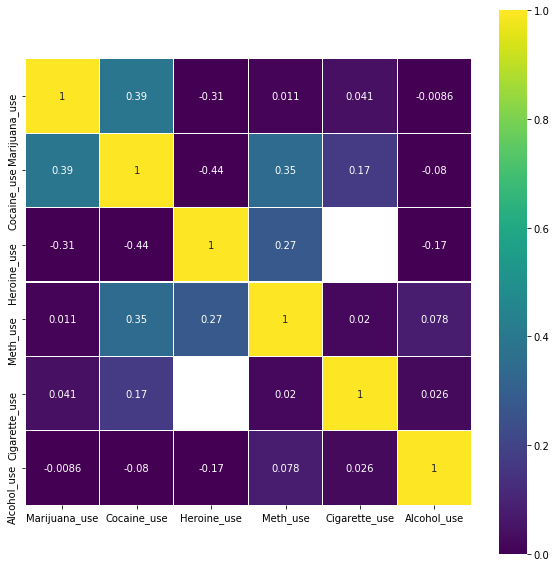

In [592]:
colormap = plt.cm.viridis
plt.figure(figsize=(10,10))
sns.heatmap(df.astype(float).drop(axis=1, labels='ID').corr(),linewidths=0.1, vmax=1.0, vmin=0.0, square=True, cmap=colormap, annot=True)

In [593]:
help(df.corr) # check if we should use pearson, spearman or kendall

Help on method corr in module pandas.core.frame:

corr(method='pearson', min_periods=1) method of pandas.core.frame.DataFrame instance
    Compute pairwise correlation of columns, excluding NA/null values
    
    Parameters
    ----------
    method : {'pearson', 'kendall', 'spearman'}
        * pearson : standard correlation coefficient
        * kendall : Kendall Tau correlation coefficient
        * spearman : Spearman rank correlation
    min_periods : int, optional
        Minimum number of observations required per pair of columns
        to have a valid result. Currently only available for pearson
        and spearman correlation
    
    Returns
    -------
    y : DataFrame



# Introduce social determinants

In [594]:
demo = d["demographic_nhanes"][["RIAGENDR", "RIDAGEYR", "DMDEDUC3", "DMDEDUC2", "DMDHHSIZ", "INDHHIN2", "INDFMPIR"]]
nutri = d["nutrition_nhanes"][["DBQ700"]]
hos = d["hospital_ut"][["HUQ010", "HUQ090", "HUQ051"]]
health = d["healthinsurance"][["HIQ011"]]


In [595]:
socio = pd.concat([demo, hos, nutri, health], axis=1,join="inner")
socio.columns = ['Gender', 'Age', 'Education-youth','Education-adults', 'Number of people in household', 'Annual household income', 'Income/poverty', 'General health', 'Times of mental health visits', 'Times of health care receival', 'Diet quality', 'Insurance coverage']


In [596]:
socio.head(10)

,Gender,Age,Education-youth,Education-adults,Number of people in household,Annual household income,Income/poverty,General health,Times of mental health visits,Times of health care receival,Diet quality,Insurance coverage
SEQN,,,,,,,,,,,,
83732.0,1.0,62.0,NaN,5.0,2.0,10.0,4.39,3.0,2.0,5.000000e+00,3.0,1.0
83733.0,1.0,53.0,NaN,3.0,1.0,4.0,1.32,2.0,2.0,5.397605e-79,1.0,2.0
83734.0,1.0,78.0,NaN,3.0,2.0,5.0,1.51,4.0,2.0,2.000000e+00,4.0,1.0
83735.0,2.0,56.0,NaN,5.0,1.0,10.0,5.00,2.0,1.0,4.000000e+00,4.0,1.0
83736.0,2.0,42.0,NaN,4.0,5.0,7.0,1.23,5.0,2.0,2.000000e+00,5.0,1.0
83737.0,2.0,72.0,NaN,2.0,5.0,14.0,2.82,3.0,2.0,2.000000e+00,3.0,2.0
83738.0,2.0,11.0,6.0,NaN,5.0,6.0,1.18,3.0,2.0,1.000000e+00,NaN,1.0
83739.0,1.0,4.0,NaN,NaN,5.0,15.0,4.22,3.0,2.0,2.000000e+00,NaN,1.0
83740.0,1.0,1.0,NaN,NaN,7.0,77.0,NaN,1.0,NaN,2.000000e+00,NaN,1.0


In [597]:
#socio.drop(['ID'], axis = 1, inplace=True)

In [598]:
dfsocio = pd.concat([df, socio], axis=1, join='inner')


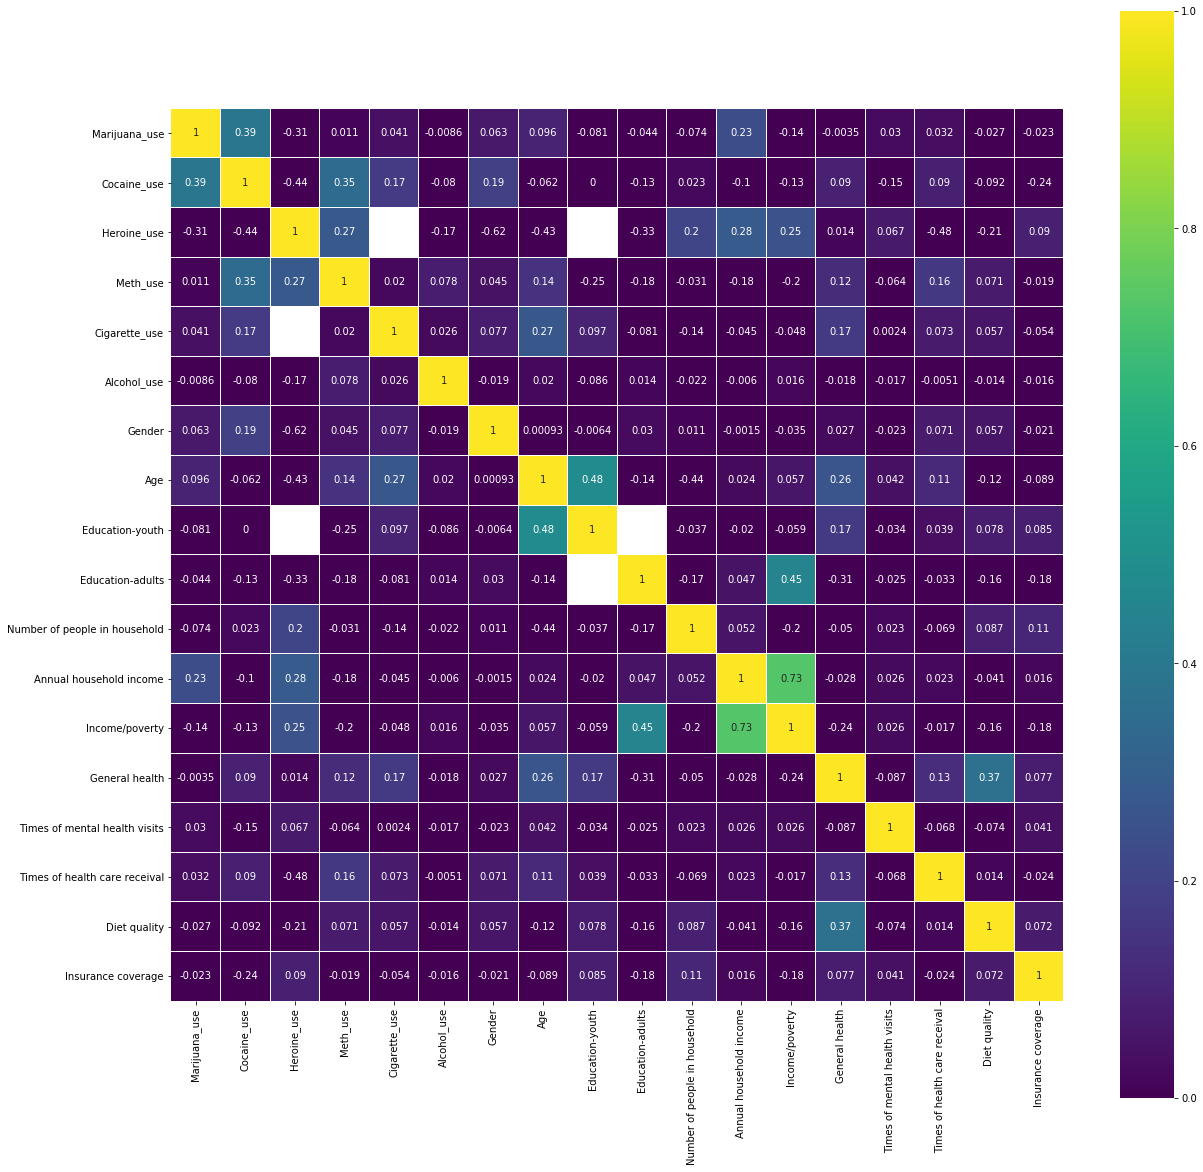

In [599]:
colormap = plt.cm.viridis
plt.figure(figsize=(20,20))
fig2 = sns.heatmap(dfsocio.astype(float).drop(axis=1, labels='ID').corr(),linewidths=0.1, vmax=1.0, vmin=0.0, square=True, cmap=colormap, annot=True)
plt.savefig("fig2.png")

# Biological correlates of Drug Use

In [600]:
# biological information
bmi = d["BMI"].BMXBMI
dia = d["diabetes_nhanes"][["DIQ010","DIQ160"]] # 1=yes, 2=no, 3=borderline
hep = d["hepatitis_nhanes"][["HEQ010", "HEQ030"]] # 1=yes, 2=no
med = d["medical_cond"][["MCQ010", "MCQ160C", "MCQ160E", "MCQ160F", "MCQ160G", "MCQ160K", "MCQ160L", "MCQ160O", "MCQ220"]]
ment = d["depression"][["DPQ020"]]

#drug = d["druguse_nhanes"][["DUQ213", "DUQ260", "DUQ300", "DUQ340", "DUQ430"]]
#last_drug = d["druguse_nhanes"][["DUQ215Q", "DUQ215U", "DUQ270Q", "DUQ270U", "DUQ310Q", "DUQ310U", "DUQ350Q", "DUQ350U"]]
# convert the time since last drug use to the unit of days

bio = pd.concat([bmi, dia, hep, med, ment], axis=1)


In [601]:
bio.columns = ['BMI','Diabetes','PreDiabetes', 'HepB', 'HepC', 'Asthma', 'CoronaryHeartDisease', 'MI', 'Stroke', 'Emphysema', 'ChronicBronchitis', 'LiverCondition','COPD','Cancer', 'Depression'] 

According to Data 1=yes, 2=no, 3=borderline


Recode data 1=yes, 0=no, 0.5-borderline

In [602]:
dfbio = pd.concat([df, bio], axis=1, join='inner')

In [603]:
dfbio.head(10)

,ID,Marijuana_use,Cocaine_use,Heroine_use,Meth_use,Cigarette_use,Alcohol_use,BMI,Diabetes,PreDiabetes,...,Asthma,CoronaryHeartDisease,MI,Stroke,Emphysema,ChronicBronchitis,LiverCondition,COPD,Cancer,Depression
SEQN,,,,,,,,,,,,,,,,,,,,,
83732.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,27.8,1.0,NaN,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,5.397605e-79
83733.0,NaN,NaN,NaN,NaN,NaN,30.0,7.0,30.8,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,5.397605e-79
83734.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,28.8,1.0,NaN,...,1.0,2.0,1.0,2.0,1.0,2.0,1.0,1.0,1.0,5.397605e-79
83735.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,42.4,2.0,1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.000000e+00
83736.0,NaN,30.0,NaN,NaN,NaN,NaN,1.0,20.3,2.0,2.0,...,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.000000e+00
83737.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.6,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,5.397605e-79
83741.0,NaN,25.0,NaN,NaN,NaN,15.0,3.0,28.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,5.397605e-79
83742.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,28.2,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,5.397605e-79
83743.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.2,2.0,2.0,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [604]:
#Diabetes recoding
for i, item in dfbio.Diabetes.iteritems():
    if item == 2.:
        dfbio.Diabetes[i] = 0.
    if item == 3.:
        dfbio.Diabetes[i] = 0.5
    if item == 1.:
        dfbio.Diabetes[i] = 1.
    else:
        dfbio.Diabetes[i] = 0.
        
#Prediabetes recoding
for i, item in dfbio.PreDiabetes.iteritems():
    if item == 2.:
        dfbio.PreDiabetes[i] = 0.
    if item == 3.:
        dfbio.PreDiabetes[i] = 0.5
    if item == 1.:
        dfbio.PreDiabetes[i] = 1.
    else:
        dfbio.PreDiabetes[i] = 0.

#Hepatitis recoding
for i, item in dfbio.HepB.iteritems():
    if item == 2.:
        dfbio.HepB[i] = 0.
    if item == 1.:
        dfbio.HepB[i] = 1.
    else:
        dfbio.HepB[i] = 0.
        
for i, item in dfbio.HepC.iteritems():
    if item == 2.:
        dfbio.HepC[i] = 0.
    if item == 1.:
        dfbio.HepC[i] = 1.
    else:
        dfbio.HepC[i] = 0.
        
        
for i, item in dfbio.Asthma.iteritems():
    if item == 2.:
        dfbio.Asthma[i] = 0.
    if item == 1.:
        dfbio.Asthma[i] = 1.
    else:
        dfbio.Asthma[i] = 0.

for i, item in dfbio.CoronaryHeartDisease.iteritems():
    if item == 2.:
        dfbio.CoronaryHeartDisease[i] = 0.
    if item == 1.:
        dfbio.CoronaryHeartDisease[i] = 1.
    else:
        dfbio.CoronaryHeartDisease[i] = 0.
        
for i, item in dfbio.MI.iteritems():
    if item == 2.:
        dfbio.MI[i] = 0.
    if item == 1.:
        dfbio.MI[i] = 1.
    else:
        dfbio.MI[i] = 0.

for i, item in dfbio.Stroke.iteritems():
    if item == 2.:
        dfbio.Stroke[i] = 0.
    if item == 1.:
        dfbio.Stroke[i] = 1.
    else:
        dfbio.Stroke[i] = 0.
        
for i, item in dfbio.Emphysema.iteritems():
    if item == 2.:
        dfbio.Emphysema[i] = 0.
    if item == 1.:
        dfbio.Emphysema[i] = 1.
    else:
        dfbio.Emphysema[i] = 0.

for i, item in dfbio.ChronicBronchitis.iteritems():
    if item == 2.:
        dfbio.ChronicBronchitis[i] = 0.
    if item == 1.:
        dfbio.ChronicBronchitis[i] = 1.
    else:
        dfbio.ChronicBronchitis[i] = 0.  
        
for i, item in dfbio.COPD.iteritems():
    if item == 2.:
        dfbio.COPD[i] = 0.
    if item == 1.:
        dfbio.COPD[i] = 1.
    else:
        dfbio.COPD[i] = 0.
        
        
for i, item in dfbio.Cancer.iteritems():
    if item == 2.:
        dfbio.Cancer[i] = 0.
    if item == 1.:
        dfbio.Cancer[i] = 1.
    else:
        dfbio.Cancer[i] = 0.
        

   
   

In [605]:
dfbio.head(10)

,ID,Marijuana_use,Cocaine_use,Heroine_use,Meth_use,Cigarette_use,Alcohol_use,BMI,Diabetes,PreDiabetes,...,Asthma,CoronaryHeartDisease,MI,Stroke,Emphysema,ChronicBronchitis,LiverCondition,COPD,Cancer,Depression
SEQN,,,,,,,,,,,,,,,,,,,,,
83732.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,27.8,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,5.397605e-79
83733.0,NaN,NaN,NaN,NaN,NaN,30.0,7.0,30.8,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,5.397605e-79
83734.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,28.8,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,5.397605e-79
83735.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,42.4,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,1.000000e+00
83736.0,NaN,30.0,NaN,NaN,NaN,NaN,1.0,20.3,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,1.000000e+00
83737.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.6,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,5.397605e-79
83741.0,NaN,25.0,NaN,NaN,NaN,15.0,3.0,28.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,5.397605e-79
83742.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,28.2,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,5.397605e-79
83743.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.2,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,NaN


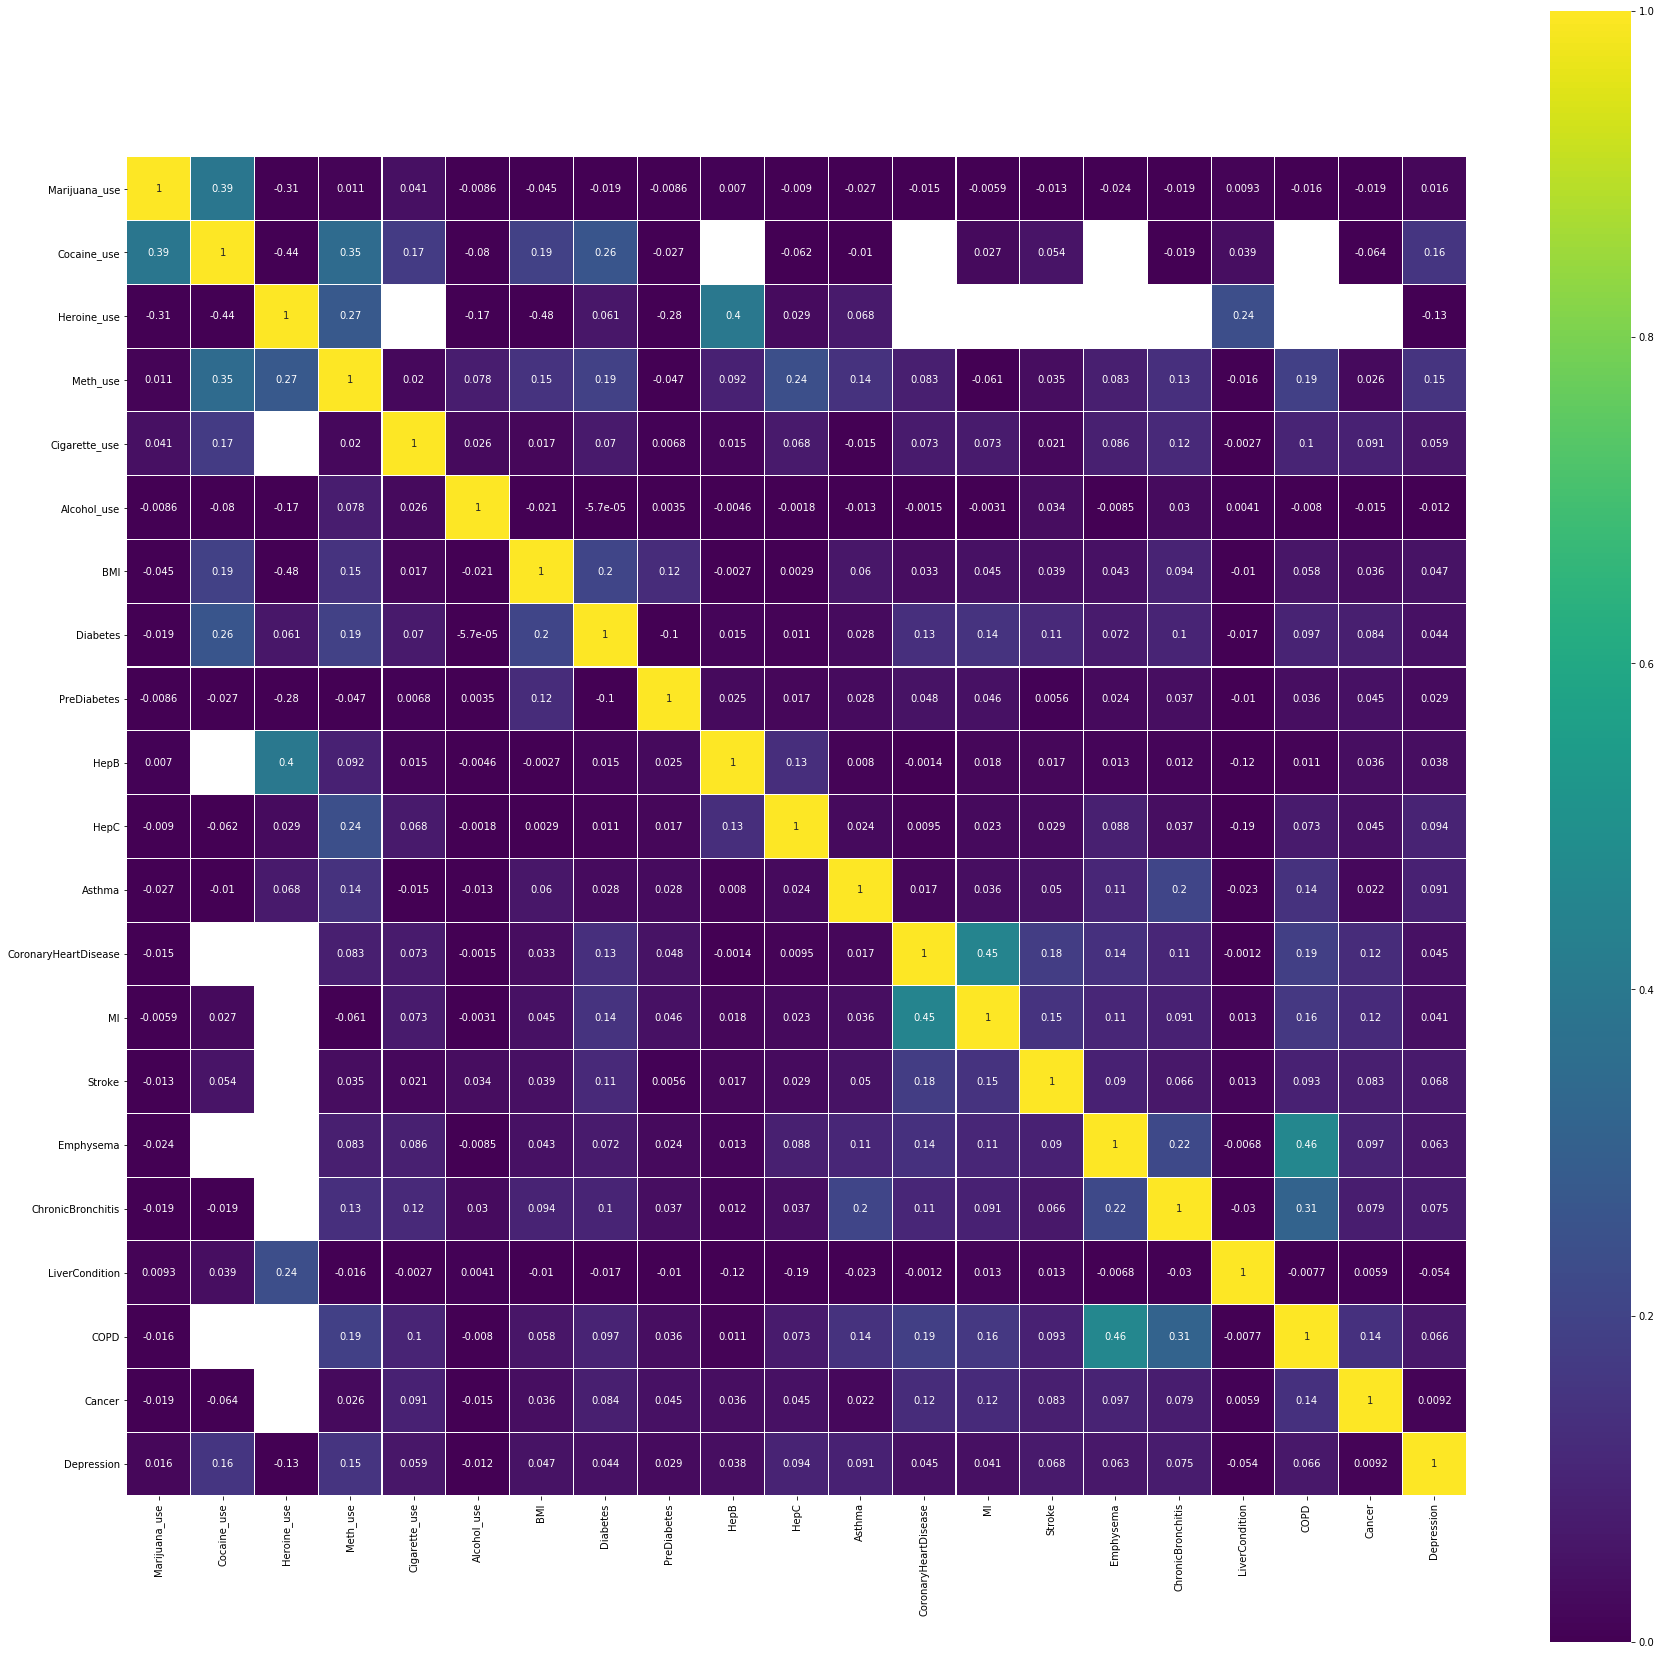

In [606]:
colormap = plt.cm.viridis
plt.figure(figsize=(30,30))
sns.heatmap(dfbio.astype(float).drop(axis=1, labels='ID').corr(),linewidths=0.1, vmax=1.0, vmin=0.0, square=True, cmap=colormap, annot=True)

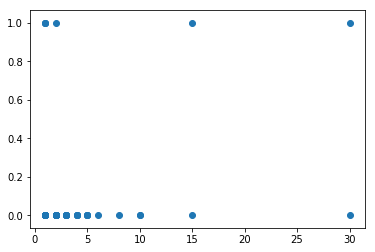

In [607]:
#histogram compare findings of this data to anothers study data set

# compare using histogram - time, social groups, how many poeple, over time
plt.scatter(dfbio.Cocaine_use, dfbio.Diabetes)

In [608]:
dagecoc = d['druguse_nhanes'].DUQ260

In [609]:
dagediabetes = d['diabetes_nhanes'].DID040

In [610]:
dfadc = pd.concat([dagecoc, dagediabetes], axis=1)

In [616]:
dfadc.columns = ['age_coke', 'age_diabetes']

Text(0,0.5,'age_diabetes')

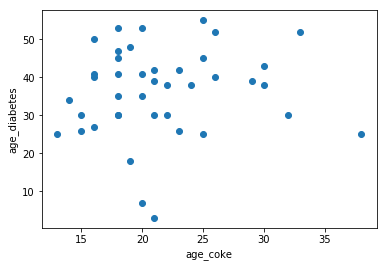

In [623]:
plt.scatter(dfadc.age_coke, dfadc.age_diabetes)
plt.xlabel('age_coke')
plt.ylabel('age_diabetes')

/Users/laura/miniconda3/envs/conda3.5/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


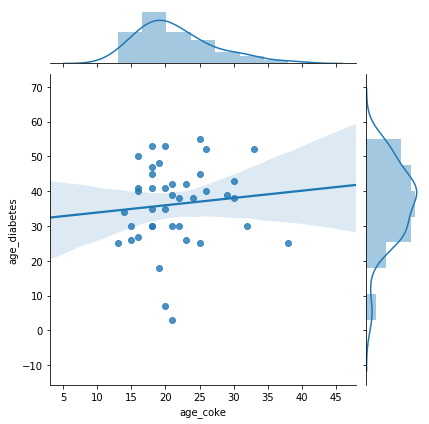

In [626]:
g = sns.jointplot(x="age_coke", y="age_diabetes", data=dfadc, kind='reg')

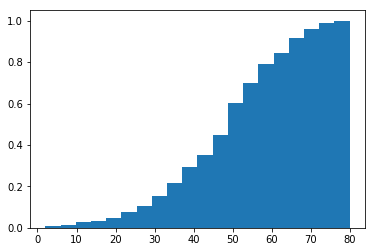

In [614]:
counts, bins, *_ = plt.hist(dfadc[dfadc.diabetes.between(2, 80)].diabetes.dropna(), bins=20, cumulative=True, density=True)
pass

In [629]:
from lifelines import KaplanMeierFitter

In [638]:
df_tmp = dfadc.dropna()
df_tmp = df_tmp[df_tmp.age_coke < df_tmp.age_diabetes]

In [640]:
T = df_tmp.age_diabetes
E = np.ones(len(df_tmp))

In [641]:
kmf = KaplanMeierFitter()
kmf.fit(T, event_observed=E)

<lifelines.KaplanMeierFitter: fitted with 35 observations, 0 censored>

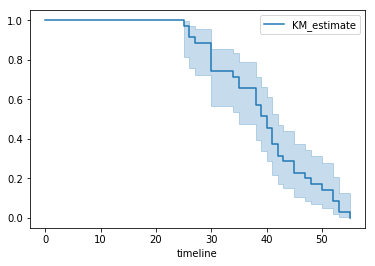

In [642]:
kmf.plot()

In [660]:
df_tmp2 = dfadc[dfadc.age_coke.isna()][dfadc.age_diabetes.notna()]
df_tmp2 = dfadc[dfadc.age_diabetes.between(2, 80)]

/Users/laura/miniconda3/envs/conda3.5/lib/python3.5/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [661]:
T = df_tmp2.age_diabetes
E = np.ones(len(df_tmp2))

In [662]:
kmf2 = KaplanMeierFitter()
kmf2.fit(T, event_observed=E)

<lifelines.KaplanMeierFitter: fitted with 840 observations, 0 censored>

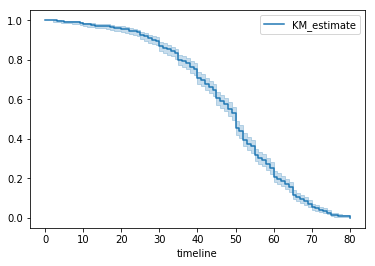

In [663]:
kmf2.plot()

/Users/laura/miniconda3/envs/conda3.5/lib/python3.5/site-packages/ipykernel_launcher.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  del sys.path[0]
/Users/laura/miniconda3/envs/conda3.5/lib/python3.5/site-packages/ipykernel_launcher.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  del sys.path[0]


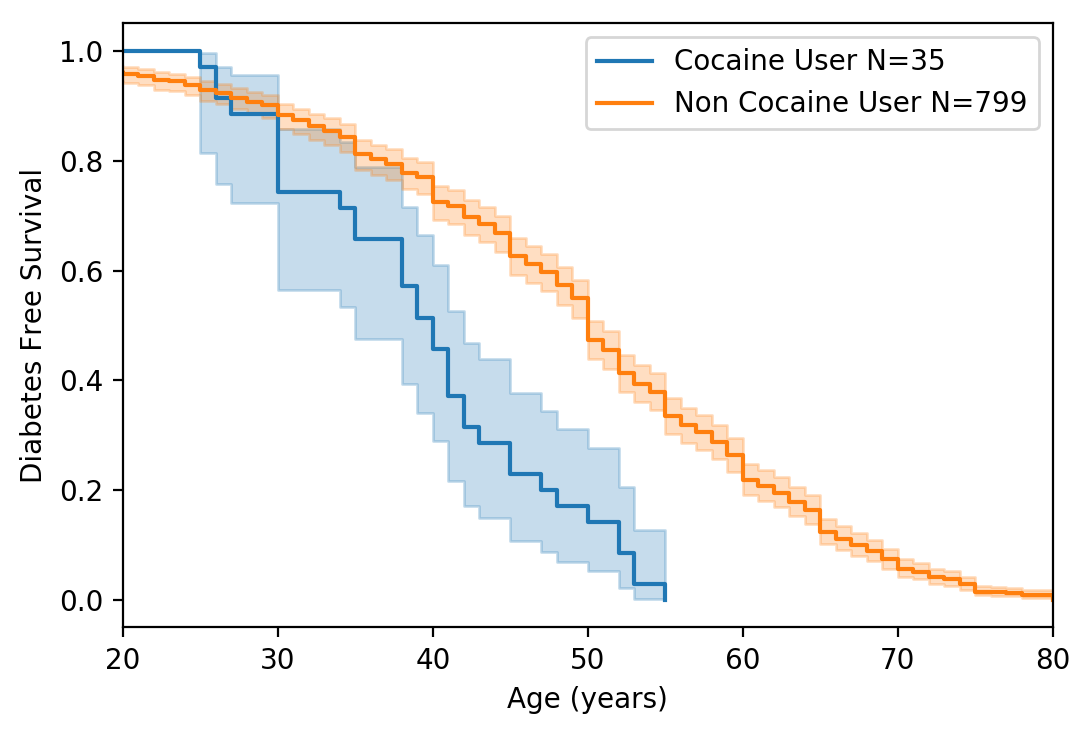

In [683]:
fig, ax = plt.subplots(dpi=200)

df_coc = dfadc.dropna()
df_coc = df_tmp[df_tmp.age_coke < df_tmp.age_diabetes]

T = df_coc.age_diabetes
E = np.ones(len(df_coc))

kmf = KaplanMeierFitter()
kmf.fit(T, event_observed=E, label="Cocaine User N={}".format(len(T)))
kmf.plot(ax=ax)

df_nococ = dfadc[dfadc.age_coke.isna()][dfadc.age_diabetes.notna()][dfadc.age_diabetes.between(2, 80)]

T = df_nococ.age_diabetes
E = np.ones(len(df_nococ))

kmf = KaplanMeierFitter()
kmf.fit(T, event_observed=E, label="Non Cocaine User N={}".format(len(T)))
kmf.plot(ax=ax)

ax.set_xlim(20, 80)
ax.set_xlabel("Age (years)")
ax.set_ylabel("Diabetes Free Survival")

plt.savefig("figures/diabetes_progression.pdf", dpi=400, bbox_inches='tight')
plt.savefig("fig_png/diabetes_progression.png")

plt.show()